# 常用的 DataFrame 操作
* merge / transform
* subset
* groupby

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# 設定 data_path
dir_data = './data/'

In [3]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 作業
1. 請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP
    * 0 個小孩
    * 有 1 - 2 個小孩
    * 有 3 - 5 個小孩
    * 有超過 5 個小孩

2. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 baxplot
3. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 [Z 轉換](https://en.wikipedia.org/wiki/Standard_score) 後的分數

In [ ]:
# 3到五個小孩
app_train[(app_train['CNT_CHILDREN'] > 2) & (app_train['CNT_CHILDREN'] < 6)]

In [4]:
#1
"""
Your code here
"""
cut_rule = [-1, 0, 2, 5, app_train['CNT_CHILDREN'].max()]
cut_label_names = ['0 個小孩', '有 1 - 2 個小孩', '有 3 - 5 個小孩', '有超過 5 個小孩']

app_train['CNT_CHILDREN_GROUP'] = pd.cut(app_train['CNT_CHILDREN'].values, cut_rule, include_lowest=True, labels=cut_label_names)
# value_counts預設以降冪方式排序(會最先呈現最頻繁出現的類別)
app_train['CNT_CHILDREN_GROUP'].value_counts()

0 個小孩          215371
有 1 - 2 個小孩     87868
有 3 - 5 個小孩      4230
有超過 5 個小孩          42
Name: CNT_CHILDREN_GROUP, dtype: int64

In [5]:
#2-1
"""
Your code here
"""
grp = ['CNT_CHILDREN_GROUP', 'TARGET']

grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL']
grouped_df.mean()
# grouped_df = app_train.groupby(grp)
# grouped_df['AMT_INCOME_TOTAL'].mean()

CNT_CHILDREN_GROUP  TARGET
0 個小孩               0         166747.010980
                    1         160804.210548
有 1 - 2 個小孩         0         174590.584401
                    1         176115.362720
有 3 - 5 個小孩         0         175053.742913
                    1         160677.385714
有超過 5 個小孩           0         139159.090909
                    1         180000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

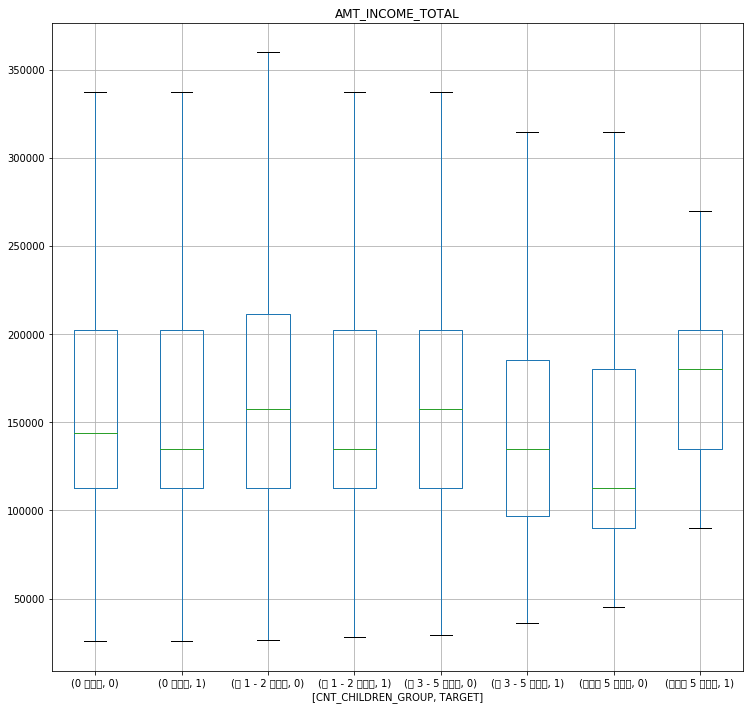

In [6]:
#2-2
"""
Your code here
"""
plt_column = ['AMT_INCOME_TOTAL']
plt_by = ['CNT_CHILDREN_GROUP', 'TARGET']

# pandas的畫法
app_train.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(12,12))
plt.suptitle('')
plt.show()

In [7]:
#3
"""
Your code here
"""
# z score: (df - df.mean())/df.std()
app_train['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = grouped_df.apply(lambda x: (x - np.mean(x))/np.std(x))

app_train[['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']].head()

,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET
0,202500.0,0.491536
1,270000.0,0.972437
2,67500.0,-0.934708
3,135000.0,-0.298993
4,121500.0,-0.426136


### 測試區

In [6]:
# x 代表的是一筆row
grouped_df.apply(lambda x: (x - np.mean(x))/np.std(x))

0         0.491536
1         0.972437
2        -0.934708
3        -0.298993
4        -0.426136
5        -0.638041
6        -0.029872
7         1.820057
8        -0.510898
9        -0.298993
10       -0.516572
11       -1.208592
12       -0.934708
13        0.419389
14        0.209579
15       -0.087088
16       -0.553279
17       -0.778641
18       -0.510898
19       -0.703764
20       -0.298993
21        0.232197
22        2.291309
23       -0.786375
24       -0.329380
25       -0.722803
26       -0.569440
27       -0.516572
28        0.972437
29       -0.722803
            ...   
307481    0.756780
307482    0.548627
307483   -0.638041
307484    3.515297
307485    0.793773
307486    0.980965
307487   -0.468517
307488   -0.087088
307489    0.756780
307490   -0.807565
307491   -0.703764
307492    3.939107
307493   -0.298993
307494    0.793773
307495    0.124817
307496    1.820057
307497    0.124817
307498    0.294341
307499   -0.807565
307500    0.887675
307501   -0.833604
307502   -0.

In [13]:
grouped_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CNT_CHILDREN_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0 個小孩
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0 個小孩
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0 個小孩
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0 個小孩
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0 個小孩
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,0 個小孩
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0,有 1 - 2 個小孩
10,100014,0,Cash loans,F,N,Y,1,112500.0,652500.0,21177.0,...,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,有 1 - 2 個小孩
13,100017,0,Cash loans,M,Y,N,1,225000.0,918468.0,28966.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,有 1 - 2 個小孩
17,100021,0,Revolving loans,F,N,Y,1,81000.0,270000.0,13500.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,有 1 - 2 個小孩
